In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import integrate
#from sauron_colormap import sauron

In [2]:
def smooth_mask(cube,beam,chans2look,rmsfac=3):
    mask=ndimage.uniform_filter(cube,size=[4,beam*1.5,beam*1.5])
    quart=np.floor(np.array(cube.shape)/8.).astype(np.int)
    half=np.floor(np.array(cube.shape)/2.).astype(np.int)
    #print(half, quart)
    rms=np.nanstd(mask[chans2look[0]:chans2look[1],half[1]-quart[1]:half[1]+quart[1],half[2]-quart[2]:half[2]+quart[2]])
    return mask>rms*rmsfac

In [3]:
hdu=fits.open('/Users/jelford/Documents/PhD_Work/CARS_Data/HE11082813/cleanco.fits')

In [5]:
header=hdu[0].header
print(header)

SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    4                                                  NAXIS1  =                  128                                                  NAXIS2  =                  128                                                  NAXIS3  =                  243                                                  NAXIS4  =                    1                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BTYPE   = 'Intensity'                                                           OBJECT  = 'HE1108-2813'                                                                                                 

In [4]:
data=hdu[0].data
hdr=hdu[0].header
beamtab=hdu[1].data
bmajas=np.median(beamtab['BMAJ'])
bminas=np.median(beamtab['BMIN'])
bmaj=bmajas/3600
bmin=bminas/3600
mask=smooth_mask(data,hdr['BMAJ']/np.abs(hdr['CDELT1']),[1,20],rmsfac=5)

In [5]:
print(hdr)

SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    3                                                  NAXIS1  =                  300                                                  NAXIS2  =                  300                                                  NAXIS3  =                   60                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   1.263115555048E-04                                                  BMIN    =   1.067612237400E-04                                                  BPA     =  -8.039337921143E+01                                                  BTYPE   = 'Intensity'                   

In [13]:
x=np.arange(-2430,2430,20)
x.shape

(243,)

In [5]:
def mom_0(cube,mask):
    m0=(cube*mask).sum(axis=0)
    return m0

In [6]:
m0=mom_0(data,mask)
#m0=(data*mask).sum(axis=0)

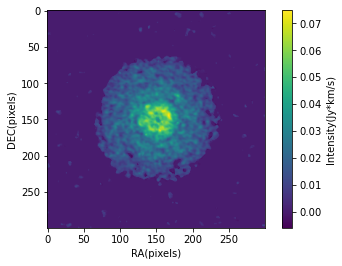

In [16]:
plt.imshow(m0)
plt.xlabel('RA(pixels)')
plt.ylabel('DEC(pixels)')
plt.colorbar(label='Intensity(Jy*km/s)')

In [18]:
hdr=hdu[0].header

In [19]:
v=np.arange(-300,300,10)

In [41]:
def mom_1(cube,mask,v):
    m1=(cube.T*mask.T*v).sum(axis=2)/(cube*mask).sum(axis=0)
    return m1
#m1=(data.T*mask.T*v).sum(axis=2)/(data*mask).sum(axis=0)
m1=mom_1(data,mask,v)

<ipython-input-41-1d3fbb7793de>:2: RuntimeWarning: divide by zero encountered in true_divide
  m1=(cube.T*mask.T*v).sum(axis=2)/(cube*mask).sum(axis=0)
<ipython-input-41-1d3fbb7793de>:2: RuntimeWarning: invalid value encountered in true_divide
  m1=(cube.T*mask.T*v).sum(axis=2)/(cube*mask).sum(axis=0)


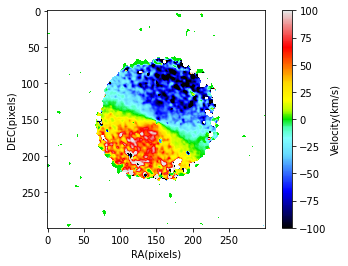

In [42]:
plt.imshow(m1, vmin=-100, vmax=100, cmap=sauron)
plt.xlabel('RA(pixels)')
plt.ylabel('DEC(pixels)')
plt.colorbar(label='Velocity(km/s)')

In [43]:
crpix1=hdr['crpix1']
crval1=hdr['crval1']
cdelt1=hdr['cdelt1']
crpix2=hdr['crpix2']
crval2=hdr['crval2']
cdelt2=hdr['cdelt2']
crpix3=hdr['crpix3']
crval3=hdr['crval3']
cdelt3=hdr['cdelt3']
arcsecx=3600*cdelt1
arcsecy=3600*cdelt2

<ipython-input-44-29018a87db19>:24: RuntimeWarning: invalid value encountered in multiply
  m2=m1.copy()*0.0
<ipython-input-44-29018a87db19>:27: RuntimeWarning: invalid value encountered in double_scalars
  m2[i,j]=np.sqrt(np.sum(np.abs(data[:,i,j]*mask[:,i,j]*((v-m1[j,i])**2)),axis=0)/np.sum(np.abs(data[:,i,j]*mask[:,i,j]),axis=0))
<ipython-input-44-29018a87db19>:27: RuntimeWarning: invalid value encountered in multiply
  m2[i,j]=np.sqrt(np.sum(np.abs(data[:,i,j]*mask[:,i,j]*((v-m1[j,i])**2)),axis=0)/np.sum(np.abs(data[:,i,j]*mask[:,i,j]),axis=0))


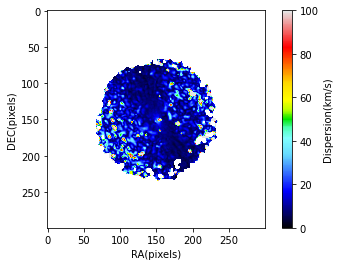

In [44]:
#no error but takes too long to run
#for i in range(0,208):
    #for j in range(0,208):
        #m2=np.sqrt((np.abs(data.T*mask.T*(np.abs(v-m1[i,j]))**2).sum(axis=2))/np.abs((data*mask).sum(axis=0)))

#tim        
#for i in range(0,self.xcoord_trim.size):
    #for j in range(0,self.ycoord_trim.size):
        #if mom0[i,j] != 0.0:
            #mom2[i,j]=np.sqrt(np.sum(np.abs(self.pbcorr_cube_trim[i,j,:]*self.mask_trim[i,j,:]) * (self.vcoord_trim - mom1[i,j]) ** 2, axis=0) / np.sum(abs(self.pbcorr_cube_trim[i,j]*self.mask_trim[i,j,:]), axis=0))

#runs but gets wrong result
#for i in range(0,208):
    #for j in range(0,208):
        #A=v-m1[i,j]
        
#m2=np.sqrt(((np.abs(data.T*mask.T*(np.abs(A)**2)).sum(axis=2))/np.abs((data*mask).sum(axis=0))))

#for i in range(0,208):
    #for j in range(0,208):
        #m2=np.sqrt(np.sum(np.abs(data[:,i,j]*mask[:,i,j])*(v-m1[i,j])**2, axis=0)/np.sum(np.abs(data[:,i,j]*mask[:,i,j]), axis=0))
#error invalid shape () for image data

m2=m1.copy()*0.0
for i in range(0,300):
    for j in range(0,300):
        m2[i,j]=np.sqrt(np.sum(np.abs(data[:,i,j]*mask[:,i,j]*((v-m1[j,i])**2)),axis=0)/np.sum(np.abs(data[:,i,j]*mask[:,i,j]),axis=0))

plt.imshow(m2, cmap=sauron, vmin=0, vmax=100)
plt.xlabel('RA(pixels)')
plt.ylabel('DEC(pixels)')
plt.colorbar(label='Dispersion(km/s)')

In [45]:
data.shape

(60, 300, 300)

In [8]:
def spectrum(cube):
    spec=cube.sum(axis=1).sum(axis=1)
    return spec

In [9]:
def mask_spectrum(cube, mask):
    data_mask=cube*mask
    spec_mask=data_mask.sum(axis=1).sum(axis=1)
    return spec_mask

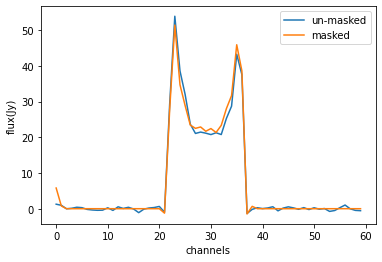

In [10]:
spec=spectrum(data)
spec_mask=mask_spectrum(data,mask)
#spec=data[:,0:300,0:300].sum(axis=1).sum(axis=1)
#spec_mask=data_mask[:,0:300,0:300].sum(axis=1).sum(axis=1)
plt.plot(spec, label="un-masked")
plt.plot(spec_mask, label="masked")
plt.xlabel('channels')
plt.ylabel('flux(Jy)')
plt.legend()

In [12]:
mass=integrate.trapz(spec)
print(mass)

438.75946


4.547215998172437


Text(0, 0.5, 'velocity')

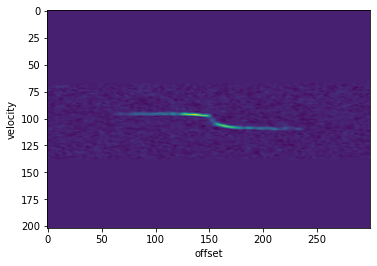

In [51]:
data_rot=ndimage.rotate(data, -30)
slit_width=hdr['BMAJ']/np.abs(cdelt1)
print(slit_width)
data_slice=data_rot[:,147:152,:]
pvd=data_slice.sum(axis=1)
plt.imshow(pvd)
plt.xlabel('offset')
plt.ylabel('velocity')

In [21]:
print(hdr)

SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    3                                                  NAXIS1  =                  300                                                  NAXIS2  =                  300                                                  NAXIS3  =                   60                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   1.263115555048E-04                                                  BMIN    =   1.067612237400E-04                                                  BPA     =  -8.039337921143E+01                                                  BTYPE   = 'Intensity'                   